In [1]:
import csv
def read_csv(filename):
    filename += ".csv"
    filename = "CSV/" + filename 
    lists = []
    with open(filename, encoding="UTF-8") as f:
        for list in csv.reader(f):
            list[1] = float(list[1])
            list[2] = float(list[2])
            lists.append(list)
    return lists

In [2]:
lists_IKEA = read_csv("IKEA")
lists_COSTCO = read_csv("COSTCO")
lists_LALAPORT = read_csv("LALAPORT")
lists_NITORI = read_csv("NITORI")
lists_DECOHOME = read_csv("DECOHOME")
lists_station = read_csv("station")
lists_all_stations = read_csv("all_stations")
lists_IC = read_csv("IC")

In [3]:
import folium
from folium.features import CustomIcon

def create_icon(path):
    return CustomIcon(
    icon_image = path,
    icon_size = (500, 500),
    icon_anchor = (30, 30),
    popup_anchor = (3, 3)
    )

icon_ikea = create_icon('icons/ikea.png')
icon_costco = create_icon('icons/costco.png')

icon_hub = create_icon('icons/hub.png')
icon_station = create_icon('icons/station.png')
icon_ic = create_icon('icons/ic.png')

icon_lalaport = create_icon('icons/lalaport.png')
icon_nitori = create_icon('icons/nitori.png')
icon_decohome = create_icon('icons/decohome.png')

icon_ikea = CustomIcon(
    icon_image = 'icons/ikea.png',
    icon_size = (50, 50),
    icon_anchor = (30, 30),
    popup_anchor = (3, 3)
)

In [4]:
# define the function to visualize the map
import folium

def create_icon(path):
    return CustomIcon(
    icon_image = path,
    icon_size = (30, 30),
    icon_anchor = (30, 30),
    popup_anchor = (3, 3)
    )
            
def show_map(latitude, longitude, icon_others, lists_others, map):
    
    
    # loop for list IKEA
    for i in range(len(lists_IKEA)): 
        icon_ikea = create_icon('icons/ikea.png')     
           
        name = lists_IKEA[i][0]
        latitude = lists_IKEA[i][1]
        longitude = lists_IKEA[i][2]
        
        # add circle on the map
        folium.Marker(
            location=[latitude, longitude],
            popup=name,
            icon = icon_ikea
        ).add_to(map)

    # loop for list COSTCO
    for i in range(len(lists_COSTCO)): 
        icon_costco = create_icon('icons/costco.png')
                
        name = lists_COSTCO[i][0]
        latitude = lists_COSTCO[i][1]
        longitude = lists_COSTCO[i][2]
        
        # add circle on the map
        folium.Marker(
            location=[latitude, longitude],
            popup=name,
            icon = icon_costco
        ).add_to(map)

    # loop for list others
    for i in range(len(lists_others)): 
        icon_hub = create_icon('icons/hub1.png')
        icon_station = create_icon('icons/station.png')
        icon_ic = create_icon('icons/ic.png')

        icon_lalaport = create_icon('icons/lalaport.png')
        icon_nitori = create_icon('icons/nitori.png')
        icon_decohome = create_icon('icons/decohome.png')
        
        if (lists_others == lists_station):
            icon_others = icon_hub
        elif (lists_others == lists_all_stations):
            icon_others = icon_station
        elif (lists_others == lists_IC):
            icon_others = icon_ic
        elif (lists_others == lists_LALAPORT):
            icon_others = icon_lalaport
        elif (lists_others == lists_NITORI):
            icon_others = icon_nitori
        elif (lists_others == lists_DECOHOME):
            icon_others = icon_decohome
        
        name = lists_others[i][0]
        latitude = lists_others[i][1]
        longitude = lists_others[i][2]
        
        # add circle on the map
        folium.Marker(
            radius=5000,
            location=[latitude, longitude],
            popup=name,
            icon = icon_others
        ).add_to(map)
        


# define the function for visualization of the hub station
def show_map_hub_station(latitude, longitude, map):
    show_map(latitude, longitude, icon_hub, lists_station, map)

# define the function for visualization of the LALAPORT
def show_map_lalaport(latitude, longitude, map):
    show_map(latitude, longitude, icon_lalaport, lists_LALAPORT, map)

# define the function for visualization of the NITORI
def show_map_nitori(latitude, longitude, map):
    show_map(latitude, longitude, icon_nitori, lists_NITORI, map)

# define the function for visualization of the hub DECOHOME
def show_map_decohome(latitude, longitude, map):
    show_map(latitude, longitude, icon_decohome, lists_DECOHOME, map)


In [5]:
# define the function to visualize the map
import folium
from geopy.distance import geodesic

def create_icon(path):
    return CustomIcon(
    icon_image = path,
    icon_size = (30, 30),
    icon_anchor = (30, 30),
    popup_anchor = (3, 3)
    )
            
def show_map_truncate(latitude, longitude, icon_others, lists_others, map):
    
    lat_long = (latitude, longitude)
    
    # loop for list IKEA
    for i in range(len(lists_IKEA)): 
        icon_ikea = create_icon('icons/ikea.png')     
           
        name = lists_IKEA[i][0]
        latitude = lists_IKEA[i][1]
        longitude = lists_IKEA[i][2]
        
        # add circle on the map
        folium.Marker(
            location=[latitude, longitude],
            popup=name,
            icon = icon_ikea
        ).add_to(map)

    # loop for list COSTCO
    for i in range(len(lists_COSTCO)): 
        icon_costco = create_icon('icons/costco.png')
                
        name = lists_COSTCO[i][0]
        latitude = lists_COSTCO[i][1]
        longitude = lists_COSTCO[i][2]
        
        # add circle on the map
        folium.Marker(
            location=[latitude, longitude],
            popup=name,
            icon = icon_costco
        ).add_to(map)

    # loop for list others
    for i in range(len(lists_others)): 
        icon_station = create_icon('icons/station.png')
        icon_ic = create_icon('icons/ic.png')
        
        if (lists_others == lists_all_stations):
            icon_others = icon_station
        elif (lists_others == lists_IC):
            icon_others = icon_ic
        
        name = lists_others[i][0]
        latitude2 = lists_others[i][1]
        longitude2 = lists_others[i][2]
        lat_long2 = (latitude2, longitude2)
        
        dist = geodesic(lat_long, lat_long2).km
        if(dist <= geodesic(300).km): 
            # add circle on the map
            folium.Marker(
                location=[latitude2, longitude2],
                popup=name,
                icon = icon_others
            ).add_to(map)
        


# define the function for visualization of the all station
def show_map_all_station(latitude, longitude, map):
    show_map_truncate(latitude, longitude, icon_station, lists_all_stations, map)

# define the function for visualization of the IC
def show_map_ic(latitude, longitude, map):
    show_map_truncate(latitude, longitude, icon_ic, lists_IC, map)


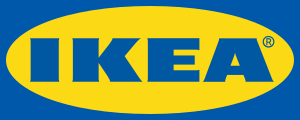
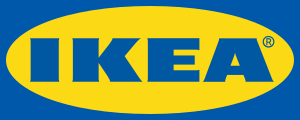
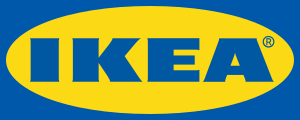
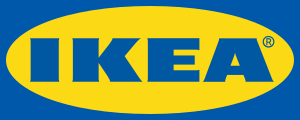
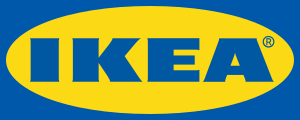
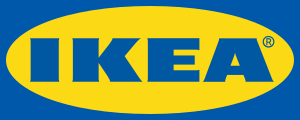
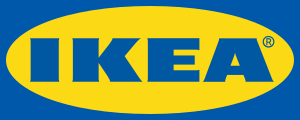
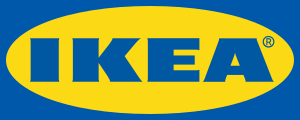
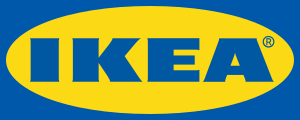
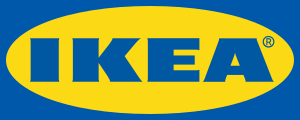
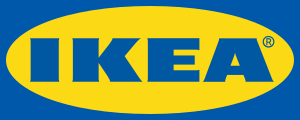
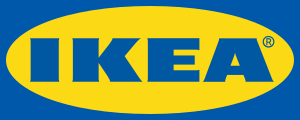
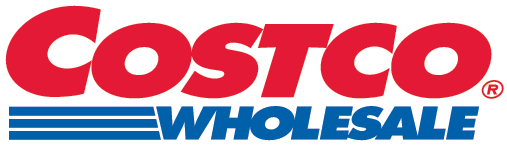
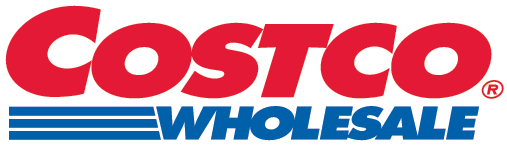
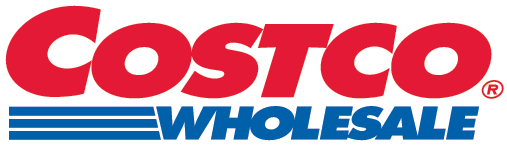
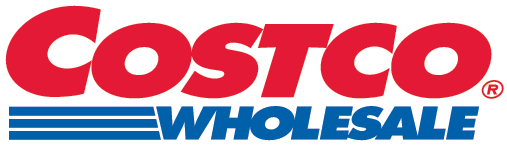
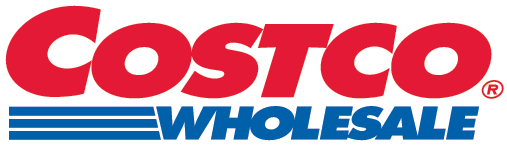
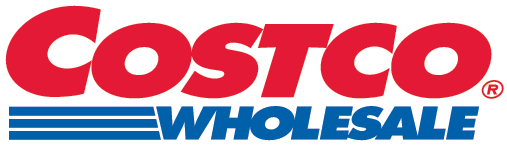
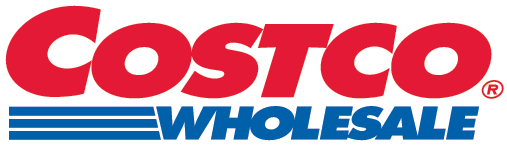
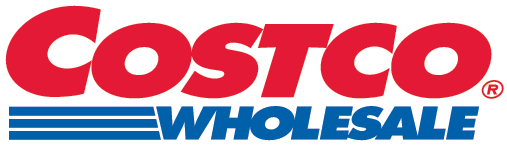
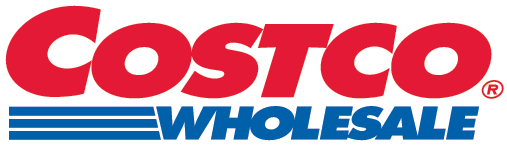
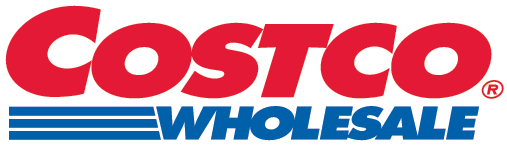
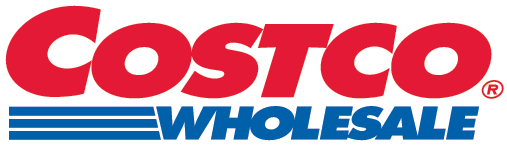
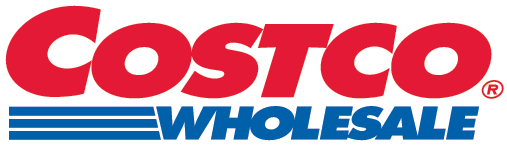
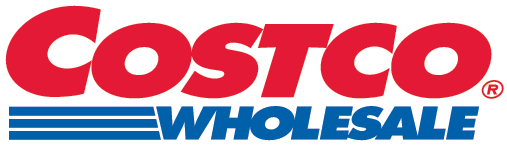
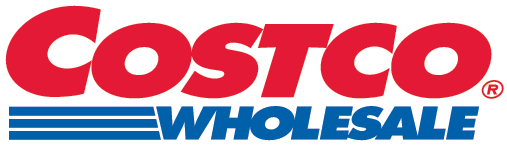
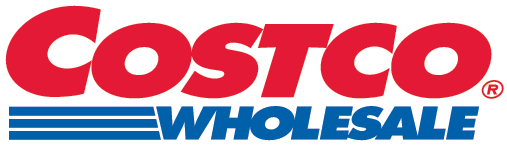
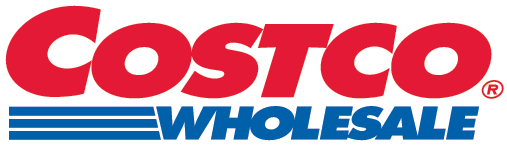
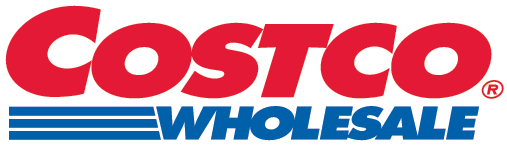
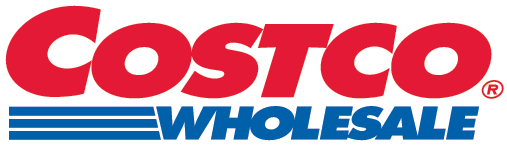
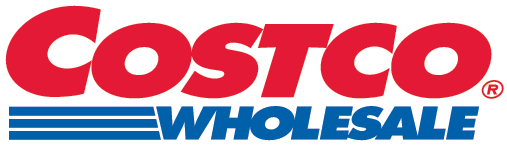
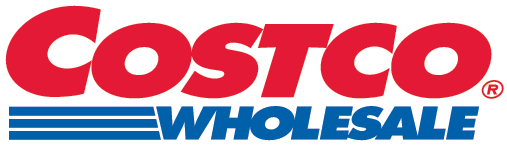
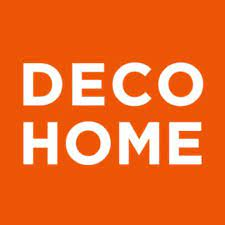
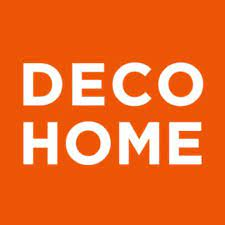
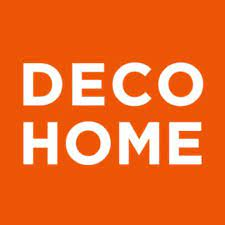
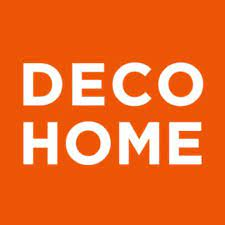
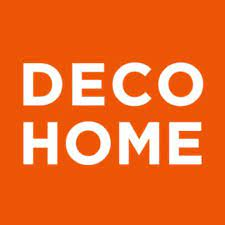
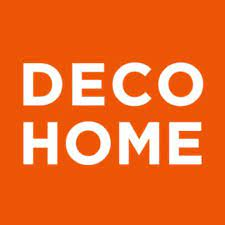
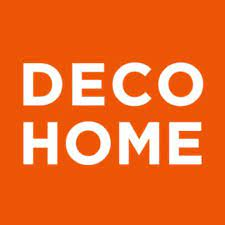
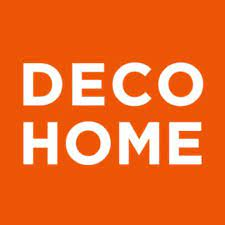
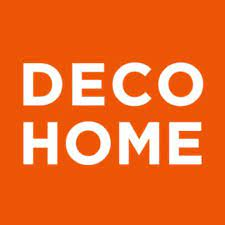
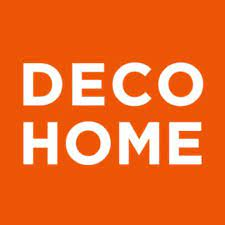
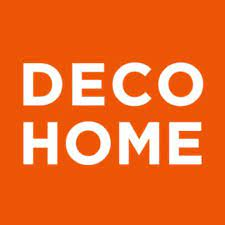
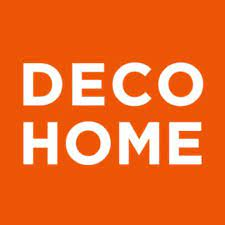
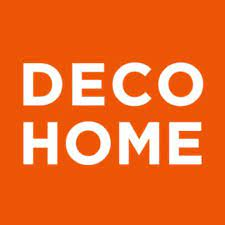
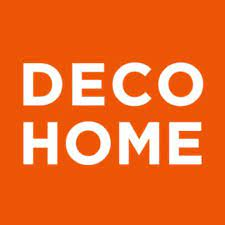
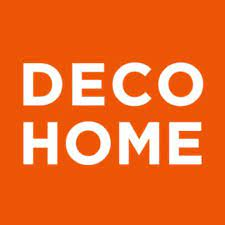
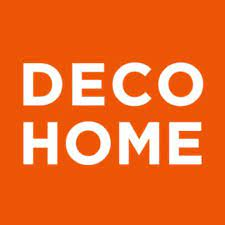
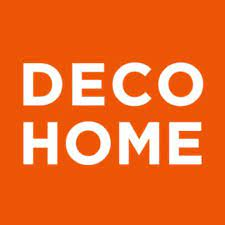
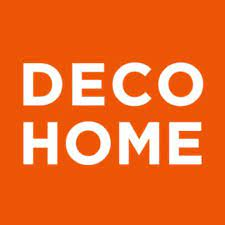
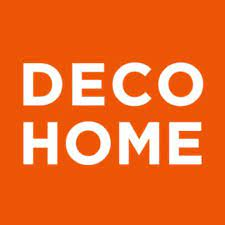
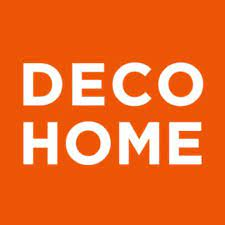
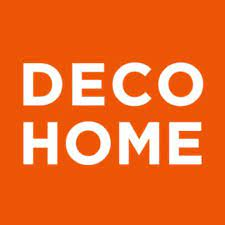
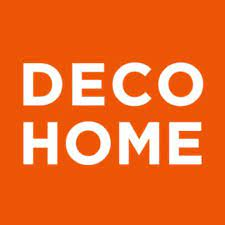
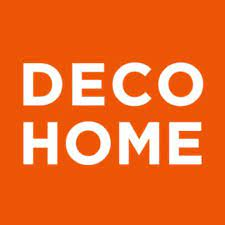
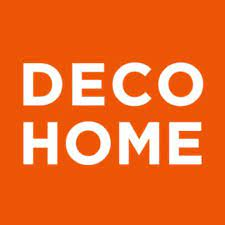
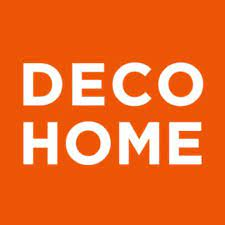
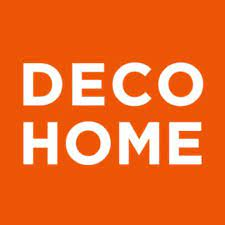
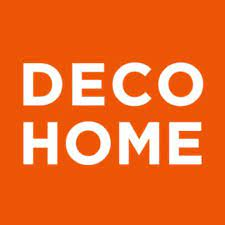
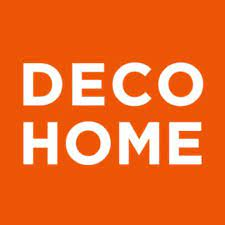
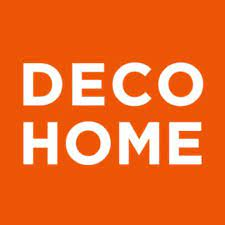
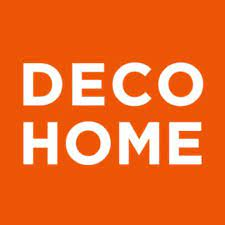
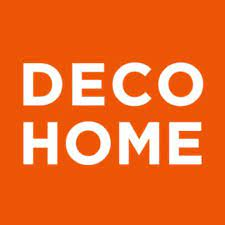
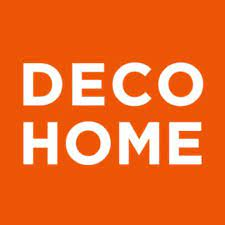
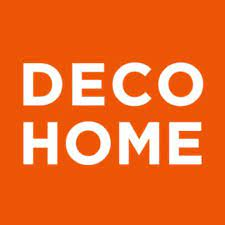
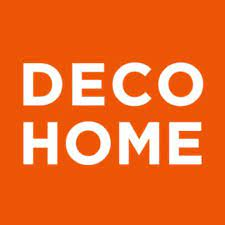
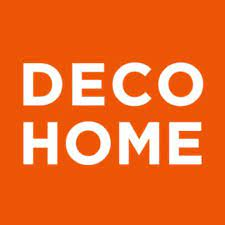
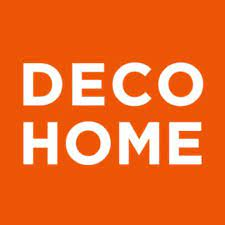
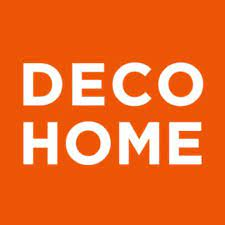
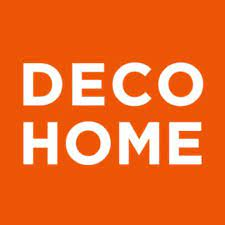
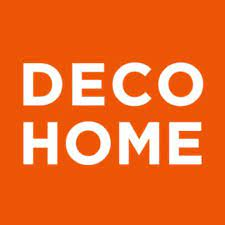
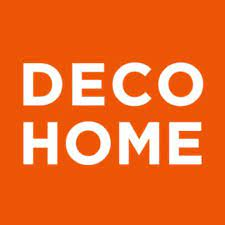
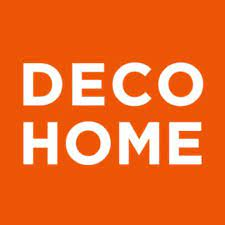
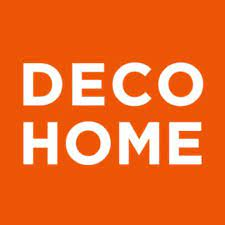
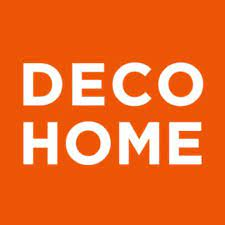
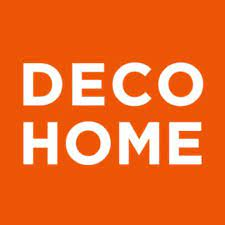
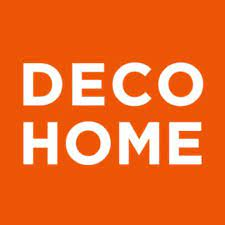
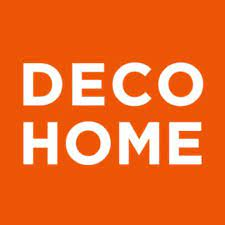
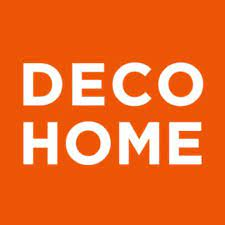
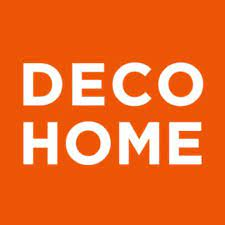
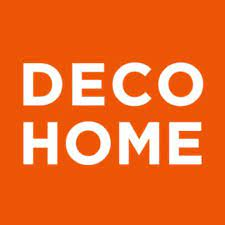
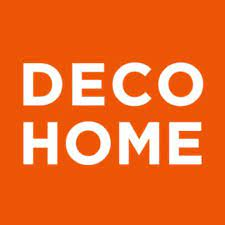

In [6]:
# Show Tokyo map (DECOHOME)
# define the map
lists_lat_long = [35.660404695921, 139.69962571292]
map = folium.Map(location=lists_lat_long, 
                tiles = "Stamen Terrain", 
                zoom_start=9)

show_map_decohome(lists_lat_long[0], lists_lat_long[1], map)
map

In [7]:
map.save("HTML/DECOHOME_Tokyo.html")


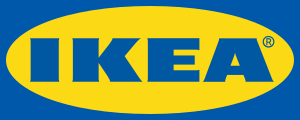
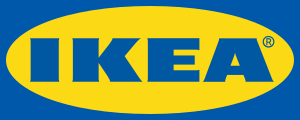
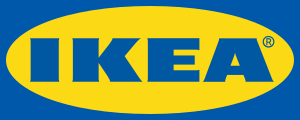
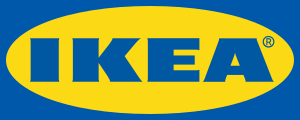
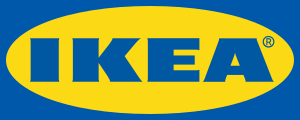
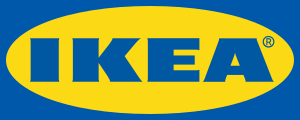
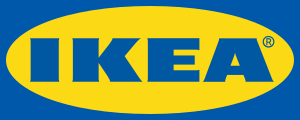
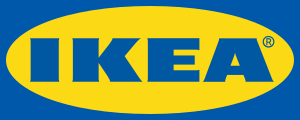
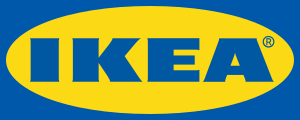
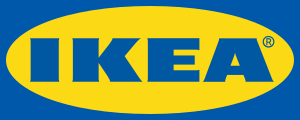
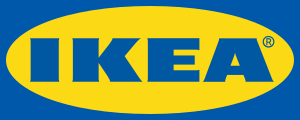
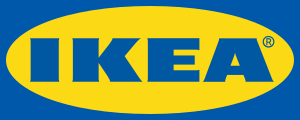
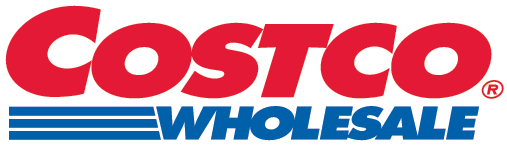
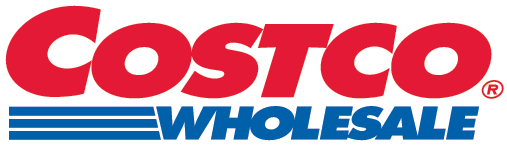
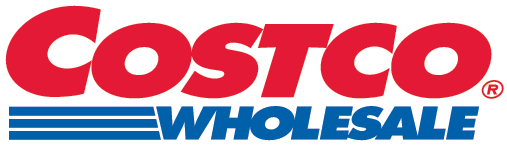
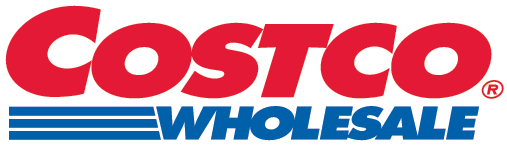
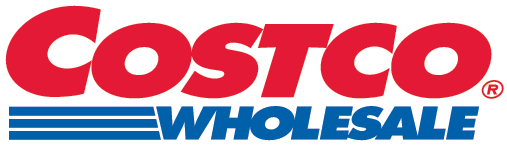
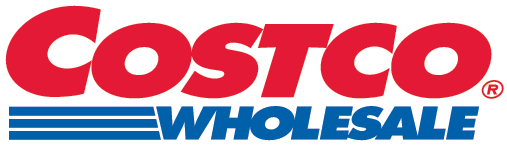
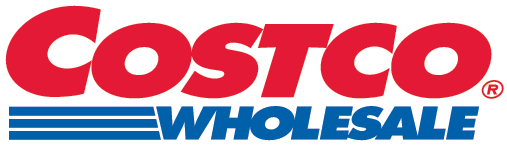
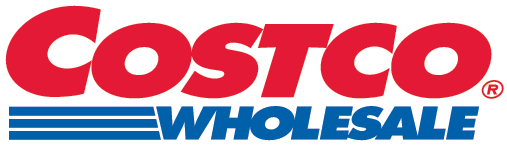
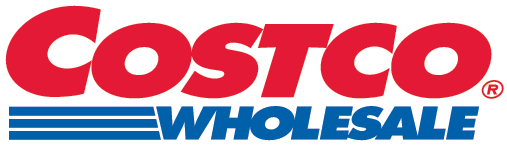
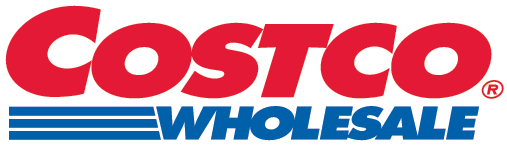
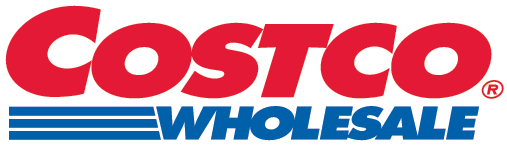
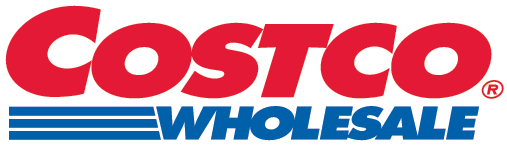
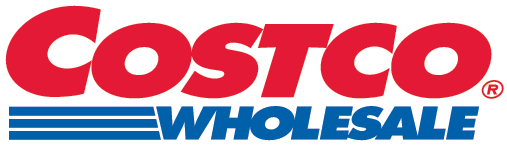
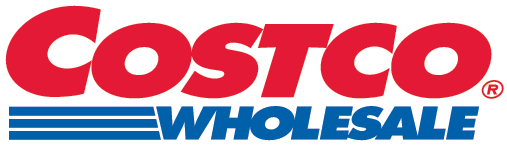
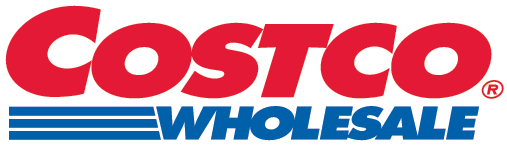
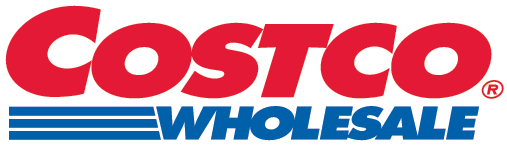
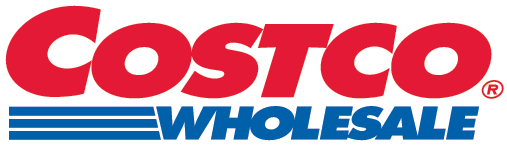
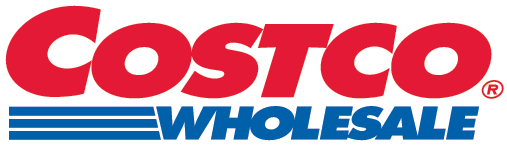
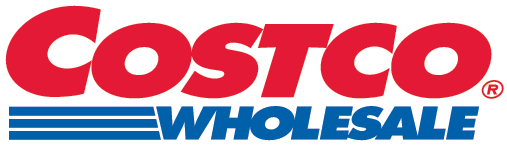
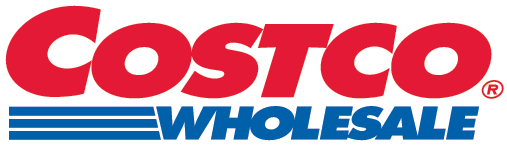
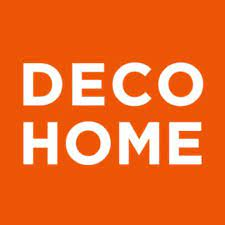
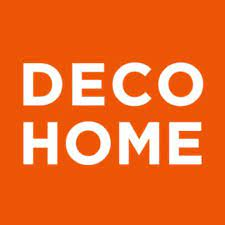
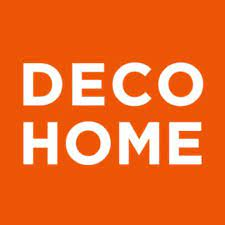
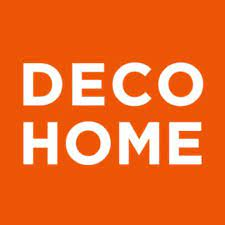
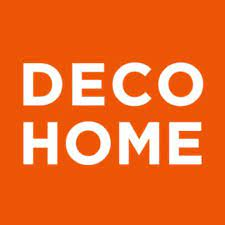
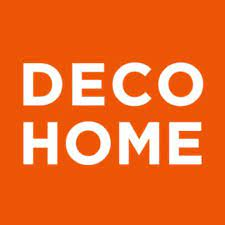
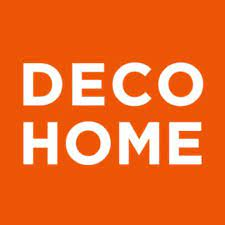
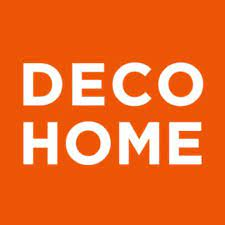
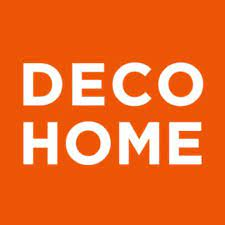
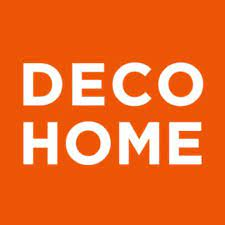
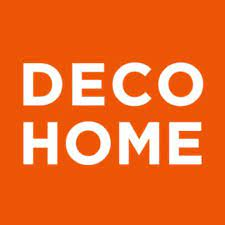
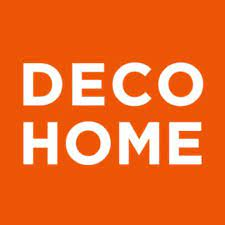
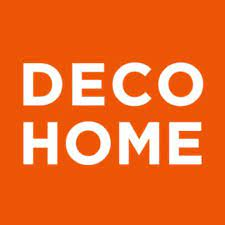
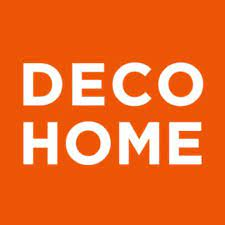
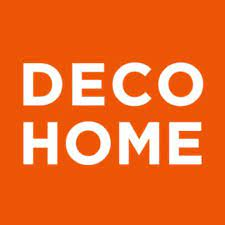
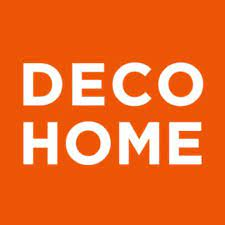
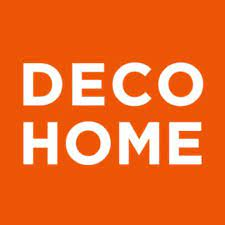
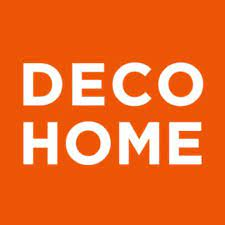
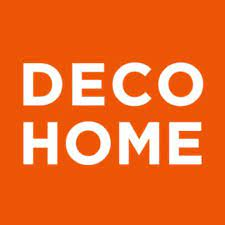
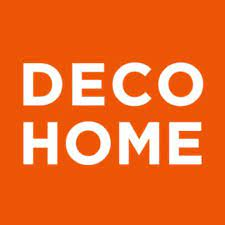
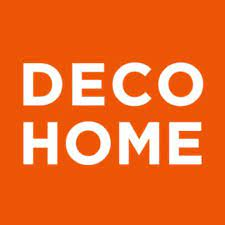
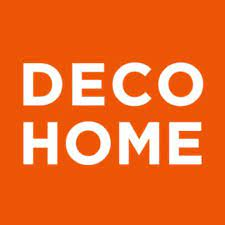
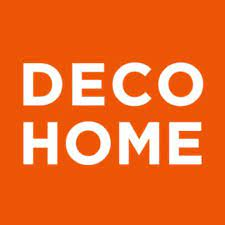
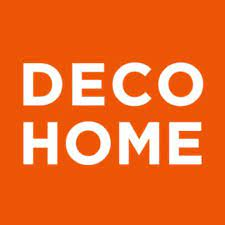
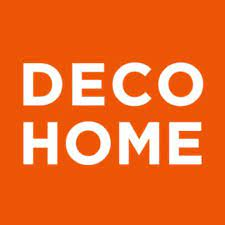
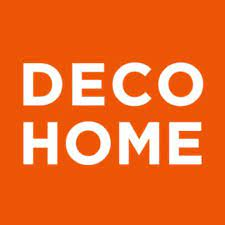
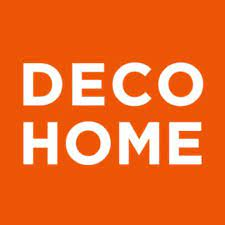
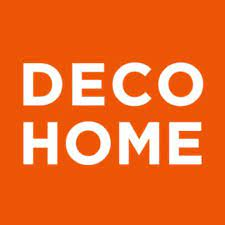
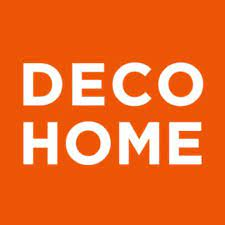
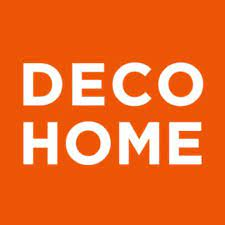
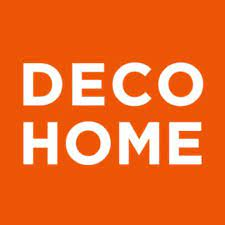
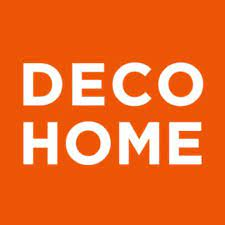
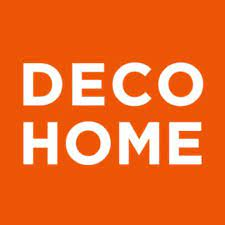
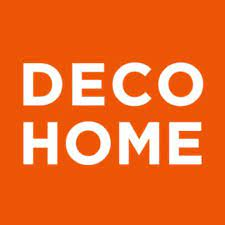
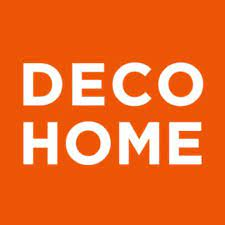
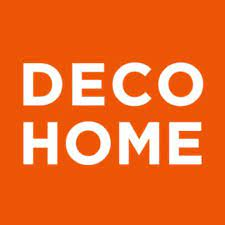
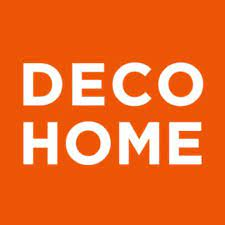
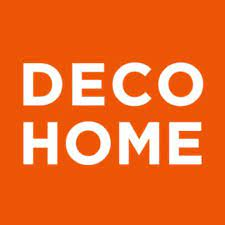
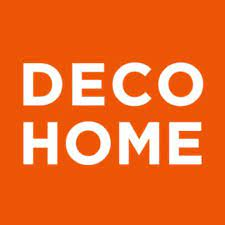
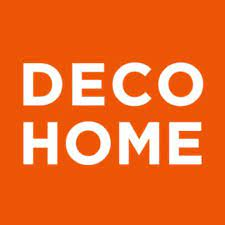
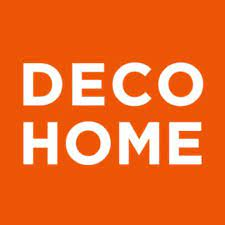
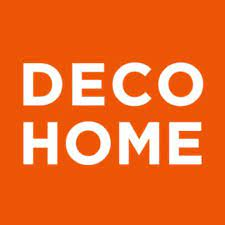
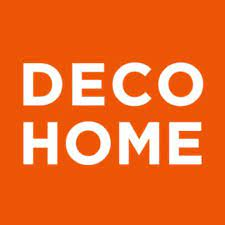
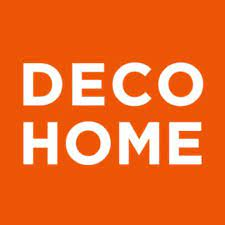
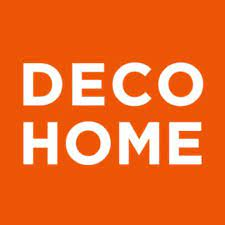
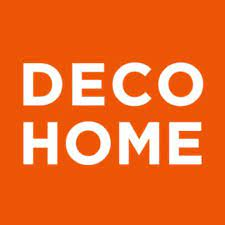
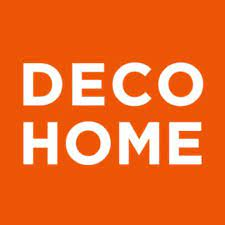
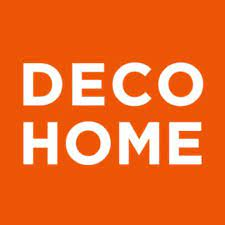
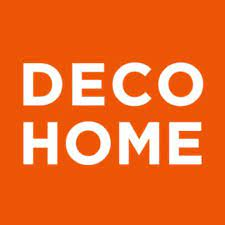
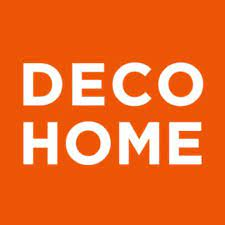

In [8]:
# Show Osaka and Kobe map (DECOHOME)
# define the map
lists_lat_long = [34.74185761949499, 135.44375197245995]
map = folium.Map(location=lists_lat_long, 
                tiles = "Stamen Terrain", 
                zoom_start=9)

show_map_decohome(lists_lat_long[0], lists_lat_long[1], map)
map

In [9]:
map.save("HTML/DECOHOME_Osaka.html")